In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [14]:
! kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:06<00:00, 139MB/s]
100% 1.06G/1.06G [00:07<00:00, 163MB/s]


In [15]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [61]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16


In [72]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [73]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
# Now start to add our own Fully connected layers over the conv_base layers

In [5]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.layers[0].trainable = False

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [9]:
# generators
# This is for the trainning dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

# This is for the test the datasets
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
 #Apply the Normlization

In [10]:

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
from tensorflow.python.keras import optimizers

In [16]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [17]:
model.fit(train_ds , epochs = 10 , validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 103ms/step - loss: 0.2762 - accuracy: 0.8826 - val_loss: 0.2130 - val_accuracy: 0.9074
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1878 - accuracy: 0.9227 - val_loss: 0.2038 - val_accuracy: 0.9112
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1559 - accuracy: 0.9353 - val_loss: 0.2086 - val_accuracy: 0.9112
Epoch 4/10
625/625 [==============================] - 57s 90ms/step - loss: 0.1387 - accuracy: 0.9429 - val_loss: 0.2169 - val_accuracy: 0.9108
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.1077 - accuracy: 0.9579 - val_loss: 0.2296 - val_accuracy: 0.9076
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0895 - accuracy: 0.9658 - val_loss: 0.2382 - val_accuracy: 0.9076
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0787 - accuracy: 0.9690 - val_loss: 0.2573 - val_accu

In [43]:
# Train our model by Fine - Tuning techanique

In [88]:
from tensorflow.keras.applications.vgg16 import VGG16

In [90]:
conv_base1 = VGG16(weights = 'imagenet',include_top = False , input_shape = [150 , 150 , 3])

In [91]:
conv_base1.trainable = True

In [92]:
set_trainable = False

set_trainable = False

for layer in conv_base1.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base1.layers:
  print(layer.name,layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [93]:
conv_base1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [94]:
models = Sequential()

In [95]:
models.add(conv_base)
models.add(Flatten())
models.add(Dense(256 , activation = 'relu'))
models.add(Dense(1 , activation = 'sigmoid'))


In [96]:
models.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [97]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [82]:
import tensorflow as tf

In [98]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [103]:
models.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = models.fit(train_ds , epochs=10 , validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4977

In [21]:
import matplotlib.pyplot as plt

In [25]:
import cv2

In [26]:
test_img_cat = cv2.imread('/content/cat.jpeg')

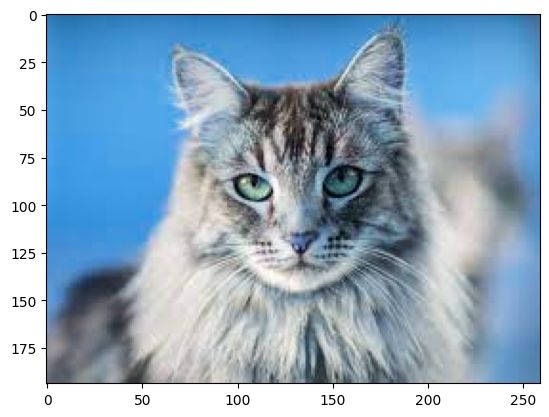

In [27]:
plt.imshow(test_img_cat)

In [28]:
test_img_cat.shape

(194, 259, 3)

In [ ]:
#test_img_cat.shape

In [29]:
test_img_cat = cv2.resize(test_img_cat,(150,150))

In [30]:
test_input = test_img_cat.reshape((1,150,150,3))

In [31]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)

In [32]:
test_img_dog = cv2.imread('/content/dog.jpeg')

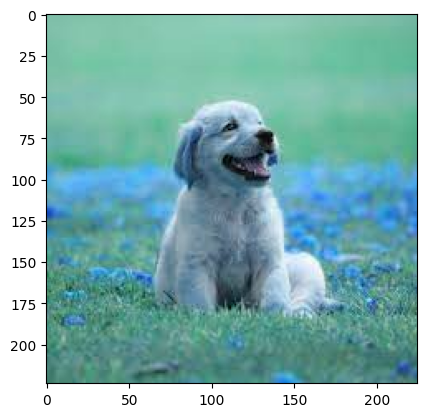

In [33]:
plt.imshow(test_img_dog)

In [34]:
test_img_dog.shape

(224, 225, 3)

In [35]:
test_img_dog = cv2.resize(test_img_dog,(150,150))

In [36]:
test_input_dog = test_img_dog.reshape(1,150,150,3)

In [37]:
model.predict(test_input_dog)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [38]:
dog_blur = cv2.imread('/content/dogblur.jpeg')

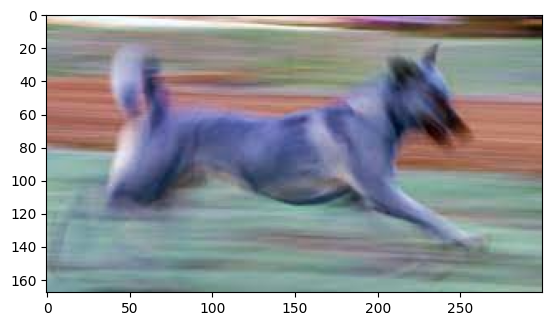

In [39]:
plt.imshow(dog_blur)

In [40]:
dog_blur.shape

(168, 300, 3)

In [41]:
dog_blur = cv2.resize(dog_blur , (150,150))

input_target = dog_blur.reshape(1,150,150,3)

In [42]:
model.predict(input_target)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
#Save the model

In [ ]:
model.save("cat_dog_model")

In [ ]:
#/content/path_to_save_model